In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found (the tables)
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

## I would like to go on this trip the week after graduation so 5/12/2019 to 5/19/2019

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# session.get_table_names()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
## first I need to figure out what the newest date in the database is. To do this I need to see the fields for each table...

## for the Measurement table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
## first I need to figure out what the newest date in the database is. To do this I need to see the fields for each table...

## for the Station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])
    


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
print("first 5 rows of the Measurement table")
engine.execute("SELECT * FROM measurement LIMIT 5").fetchall()

first 5 rows of the Measurement table


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
print("first 5 rows of the Station table")
engine.execute("SELECT * FROM station LIMIT 5").fetchall()

first 5 rows of the Station table


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [17]:
## OK, now I know that the date is only in the Measurement table, so we will use that to find the newest date
## I will set this to be "max_date"
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# max_date_substr = max_date.str.slice(3, 10)
print(f"The max date in the data is {max_date}")

The max date in the data is ('2017-08-23',)


In [18]:
p_year_from_max = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (f"The max date in the data is {max_date}, and one year before that is {p_year_from_max}")

The max date in the data is ('2017-08-23',), and one year before that is 2016-08-23


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# date = dt.datetime(2016, 8, 23)
# results = session.query(Measurement.prcp, Measurement.date).\
#     filter(Measurement.date > date).all()
# prcp_w_date = list(np.ravel(results))
# prcp_w_date

date = dt.datetime(2016, 8, 23)
sel = [Measurement.prcp, Measurement.date]
prcp_w_date = session.query(*sel).\
    filter(Measurement.date > date).all()

prcp_df = pd.DataFrame(prcp_w_date, columns=["Percipitation", "Date"])
prcp_df.set_index("Date", inplace=True)

# prcp_df



In [20]:
prcp_df_clean = prcp_df.loc[prcp_df["Percipitation"] > 0, ["Percipitation"]]
prcp_df_clean

,Percipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-28,0.01
2016-08-31,0.13
2016-09-04,0.03
2016-09-07,0.05
2016-09-09,0.03
2016-09-11,0.05
2016-09-13,0.02


In [22]:
prcp_df_s = prcp_df_clean.sort_values("Date")
prcp_df_s.head()

,Percipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,1.22
2016-08-24,1.45
2016-08-24,2.15


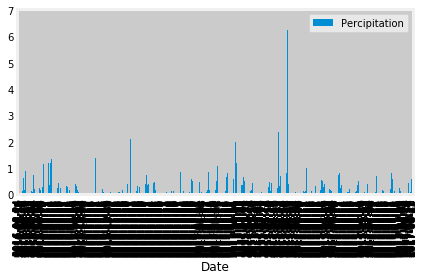

In [25]:
prcp_df_s.plot.bar()
plt.tight_layout()
plt.show()

In [23]:
# x_axis = prcp_df_s.Date
# y_axis = prcp_df_s.Percipitation

# plt.bar(x_axis, x_axis, color='b', alpha=0.5, align="center")

# tick_locations = [value for value in x_axis]
# # plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

# plt.xlim(-0.75, len(x_axis)-0.25)

# plt.ylim(0, 7)

# plt.title("Last 12 months of precipitation data")
# plt.xlabel("Date")
# plt.ylabel("precipitation")

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
# Perform a query to retrieve the data and precipitation scores



![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

## Optional Challenge Assignment

In [ ]:
# ## Step 2 - Climate App
# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
# * Use FLASK to create your routes.


In [ ]:
### Routes
# * `/api/v1.0/precipitation`
#   * Convert the query results to a Dictionary using `date` as the key and `prcp` as the value.
#   * Return the JSON representation of your dictionary.
# * `/api/v1.0/stations`
#   * Return a JSON list of stations from the dataset.
# * `/api/v1.0/tobs`
#   * query for the dates and temperature observations from a year from the last data point.
#   * Return a JSON list of Temperature Observations (tobs) for the previous year.
# * `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`
#   * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#   * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
#   * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints
# * You will need to join the station and measurement tables for some of the analysis queries.
# * Use Flask `jsonify` to convert your API data into a valid JSON response object.

